In [ ]:
!pip install kagglehub
!pip install matplotlib
!pip install pandas

In [2]:
import pandas as pd
from matplotlib import pyplot

In [ ]:
# getting the movies using the API of the website
df = pd.read_json('http://bechdeltest.com/api/v1/getAllMovies')

In [ ]:
#df.to_csv('data/bechdel_labels.csv', index=False)


In [4]:
len(df)
# 10,408 movies

10447

In [6]:
df.head()

,rating,id,imdbid,year,title
0,0,9602,3155794,1874,Passage de Venus
1,0,9804,14495706,1877,La Rosace Magique
2,0,9603,2221420,1878,Sallie Gardner at a Gallop
3,0,9806,12592084,1878,Le singe musicien
4,0,9816,7816420,1881,Athlete Swinging a Pick


In [7]:
df['rating']

0        0
1        0
2        0
3        0
4        0
        ..
10442    3
10443    1
10444    3
10445    2
10446    1
Name: rating, Length: 10447, dtype: int64

In [5]:
df['title']

0                  Passage de Venus
1                 La Rosace Magique
2        Sallie Gardner at a Gallop
3                 Le singe musicien
4           Athlete Swinging a Pick
                    ...            
10442                        Let go
10443                  Gladiator II
10444                Wicked: Part 1
10445                     Her story
10446                         Queer
Name: title, Length: 10447, dtype: object

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10408 entries, 0 to 10407
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      10408 non-null  int64 
 1   rating  10408 non-null  int64 
 2   year    10408 non-null  int64 
 3   imdbid  10408 non-null  object
 4   title   10408 non-null  object
dtypes: int64(3), object(2)
memory usage: 406.7+ KB


<Axes: xlabel='rating'>

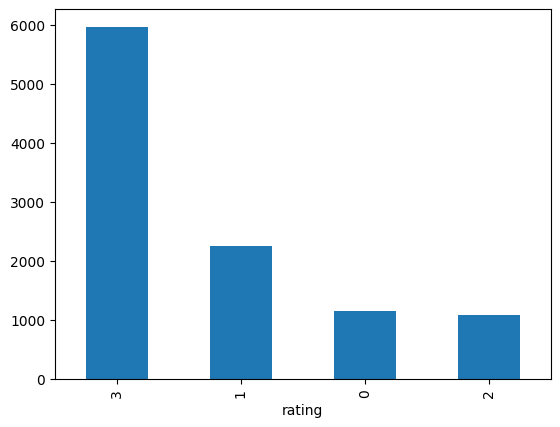

In [8]:
df['rating'].value_counts().plot.bar()

In [9]:
# Add a new column based on condition
# pythonic version
df['passed_bechdel'] = df['rating'].apply(lambda x: 1 if x == 3 else 0)

In [10]:
df.tail()

,rating,id,imdbid,year,title,passed_bechdel
10442,3,11507,27410895,2024,Let go,1
10443,1,11508,9218128,2024,Gladiator II,0
10444,3,11509,1262426,2024,Wicked: Part 1,1
10445,2,11510,31807233,2024,Her story,0
10446,1,11513,24176060,2024,Queer,0


<Axes: xlabel='passed_bechdel'>

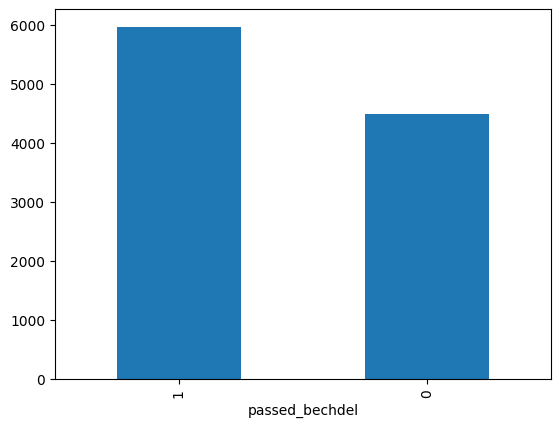

In [11]:
df['passed_bechdel'].value_counts().plot.bar()
# pretty equal distribution

In [12]:
#df['rating'].value_counts
df['passed_bechdel'].value_counts()

passed_bechdel
1    5965
0    4482
Name: count, dtype: int64

In [13]:
len(df['passed_bechdel'])

10447

In [14]:
df.head()

,rating,id,imdbid,year,title,passed_bechdel
0,0,9602,3155794,1874,Passage de Venus,0
1,0,9804,14495706,1877,La Rosace Magique,0
2,0,9603,2221420,1878,Sallie Gardner at a Gallop,0
3,0,9806,12592084,1878,Le singe musicien,0
4,0,9816,7816420,1881,Athlete Swinging a Pick,0


In [15]:
# I would like to make a list of movie names, which I would like to download the script from 
movie_titles = df['title'].to_list()
#imdb_id = df['imdbid'].to_list() - didn't use anyway

In [16]:
movie_titles[0:50]

['Passage de Venus',
 'La Rosace Magique',
 'Sallie Gardner at a Gallop',
 'Le singe musicien',
 'Athlete Swinging a Pick',
 'Buffalo Running',
 'L&#39;homme machine',
 'Man Walking Around the Corner',
 'Cockatoo Flying',
 'Child Carrying Flowers to Woman',
 'Jumping Over a Man&#39;s Back-Leapfrog',
 'Man Riding Jumping Horse',
 'Baboon Climbing a Pole',
 'Roundhay Garden Scene',
 'Accordion Player',
 'Traffic Crossing Leeds Bridge',
 'Pferd und Reiter Springen uber ein Hindernis',
 'Brighton Street Scene',
 'Leisurely Pedestrians, Open Topped Buses and Hansom Cabs with Trotting Horses',
 'Hyde Park Corner',
 'Monkeyshines, No. 1',
 'Monkeyshines, No. 2',
 'London&#39;s Trafalgar Square',
 'Monkeyshines, No. 3',
 'Mosquinha',
 'Traffic in King&#39;s Road, Chelsea',
 'Dickson Greeting',
 'Men Boxing',
 'Newark Athlete',
 'Duncan and Another, Blacksmith Shop',
 'Duncan Smoking',
 'Duncan or Devonald with Muslin Cloud',
 'Monkey and Another, Boxing',
 'Je vous aime',
 'La vague',
 'Two Fe

# Matching movie titles to scripts

Matching the movie titles with a bechdel rating to the movie script corpus

from kaggle: https://www.kaggle.com/datasets/gufukuro/movie-scripts-corpus
contains 2858 scripts

pipeline:
- the scripts are in individual txt files in a folder that I've downloaded from kaggle
- find out how many titles in the bechdel label dataset overlap with the movie scripts in the kaggle data set 
- make txt file of script names using bash 
- upload that file to ucloud (movie_scripts.txt)
- loop through movie_scripts file to find overlapping movie titles 
- upload only the overlapping scripts to ucloud and make one big dataframe w bechdel rating

In [29]:
movie_titles[0]

'Passage de Venus'

In [17]:
# using the list movie_titles 

if "Passage de Venus" in movie_titles:
    print("true")
else:
    print("false")

true


In [18]:
if "Zootopia" in movie_titles:
    print("true")
else:
    print("false")

true


In [19]:
# read txt file into list 
with open('data/movie_scripts.txt', 'r') as f:
    movie_scripts = f.read().splitlines()  # Read lines and remove the newline characters

# Print the list
print(movie_scripts)

['10 Cloverfield Lane_1179933.txt', '10 Things I Hate About You_0147800.txt', '101 Days of 101 Dalmatians_0249328.txt', '12 Angry Men_0118528.txt', '12 Monkeys_0114746.txt', '12 Years a Slave_2024544.txt', '127 Hours_1542344.txt', '13 13 13_2991516.txt', '1408_0450385.txt', '1492 Conquest of Paradise_0103594.txt', '15 Minutes_0179626.txt', '16 Blocks_0450232.txt', '17 Again_0974661.txt', '1917_8579674.txt', '1976 l lection du Parti qu b cois_11327984.txt', '2 Broke Girls_1845307.txt', '2 Guns a Grenade a Pizza Guy_1871996.txt', '2001 A Space Road Odyssey_0288910.txt', '2010 The Odyssey Continues_0235153.txt', '2012_1190080.txt', '20th Century Women_4385888.txt', '21 Grams_0315733.txt', '21 Jump Street_1232829.txt', '22 July_7280898.txt', '25th Hour_0307901.txt', '28 Days Later_0289043.txt', '28 Days_0191754.txt', '28 Weeks Later_0463854.txt', '29th Street Highlander 2 The Quickening Billy Bathgate Year of the Gun_6099126.txt', '3 10 to Yuma_0381849.txt', '3 Godfathers_0040064.txt', '3 

Now I want to see how many titles and scripts overlap

In [20]:
# List to store matches as tuples
matched_pairs = []

# Loop through movie titles and find matching scripts
for title in movie_titles:
    for script in movie_scripts:
        if script.startswith(title):
            matched_pairs.append((title, script))  # Add the match as a tuple
            break  # Stop checking once a match is found for this title

# Print the results
print("Matched pairs:")
for pair in matched_pairs:
    print(pair)

# Unmatched titles
unmatched_titles = [title for title in movie_titles if title not in [pair[0] for pair in matched_pairs]]
print("\nUnmatched titles:", unmatched_titles)



Matched pairs:
('Snow White', 'Snow White and the Huntsman_1735898.txt')
('Battleship Potemkin', 'Battleship Potemkin_0015648.txt')
('It', 'It Follows_3235888.txt')
('Metropolis', 'Metropolis_0017136.txt')
('M', 'MASH_0066026.txt')
('Grand Hotel', 'Grand Hotel_0022958.txt')
('Freaks', 'Freaks_0022913.txt')
('Vampyr', 'Vampyr_0023649.txt')
('Scarface', 'Scarface_0086250.txt')
('King Kong', 'King Kong_0024216.txt')
('Little Women', 'Little Women_3281548.txt')
('Alice in Wonderland', 'Alice in Wonderland_1014759.txt')
('Duck Soup', 'Duck Soup_0023969.txt')
('It Happened One Night', 'It Happened One Night_0025316.txt')
('Spitfire', 'Spitfire_5913184.txt')
('Maniac', 'Maniac_5580146.txt')
('Anna Karenina', 'Anna Karenina_1781769.txt')
('Fury', 'Fury_2713180.txt')
('Conquest', 'Conquest of the Planet of the Apes_0068408.txt')
('Lost Horizon', 'Lost Horizon_0029162.txt')
('Bringing Up Baby', 'Bringing Up Baby_0029947.txt')
('Angels with Dirty Faces', 'Angels with Dirty Faces_0029870.txt')
('G

In [21]:
matched_pairs[0] # might not be the exact right movie but okay

('Snow White', 'Snow White and the Huntsman_1735898.txt')

In [22]:
len(matched_pairs) # 1450 might be good enough if the distribution is okay

1453

In [23]:
len(unmatched_titles)

8994

In [24]:
# Save only the script file names from matched_pairs
# use this txt file to copy the matched scripts to another folder in bash 
matched_script_titles = [pair[1] for pair in matched_pairs]

# Write the script titles to a text file
with open("data/matched_script_titles.txt", "w") as f:
    for script in matched_script_titles:
        f.write(script + "\n")

print("Script titles saved to matched_script_titles.txt")


Script titles saved to matched_script_titles.txt


In [25]:
# filtering the dataframe to only contain the matched titles

# Extract matched titles from matched_pairs
matched_titles = [pair[0] for pair in matched_pairs]

# Filter the DataFrame to keep only rows where the title is in matched_titles
filtered_df = df[df['title'].isin(matched_titles)]

# Display the filtered DataFrame
print(len(filtered_df))

1453


In [26]:
filtered_df.head()

,rating,id,imdbid,year,title,passed_bechdel
143,3,7004,0007361,1916,Snow White,1
189,0,1308,0015648,1925,Battleship Potemkin,0
203,3,1227,0018033,1927,It,1
204,1,1267,0017136,1927,Metropolis,0
250,3,610,0022100,1931,M,1


<Axes: xlabel='passed_bechdel'>

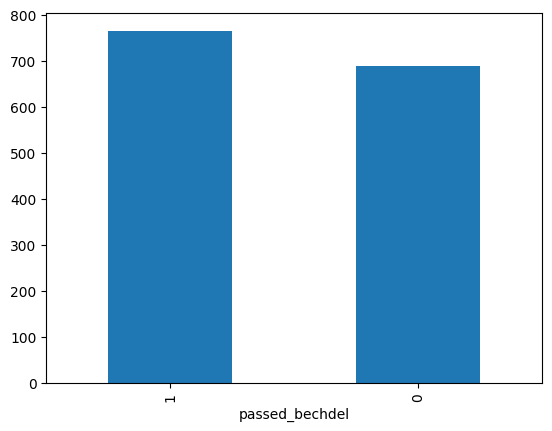

In [27]:
# check distribution of bechdel labels of the matched pairs 
filtered_df['passed_bechdel'].value_counts().plot.bar()


<Axes: xlabel='year'>

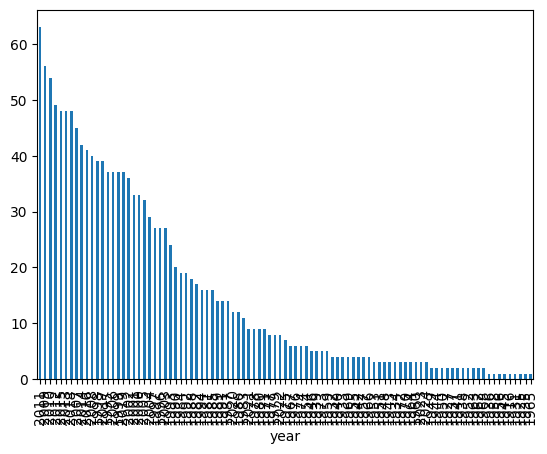

In [28]:
filtered_df['year'].value_counts().plot.bar() # make plot better


<Axes: xlabel='rating'>

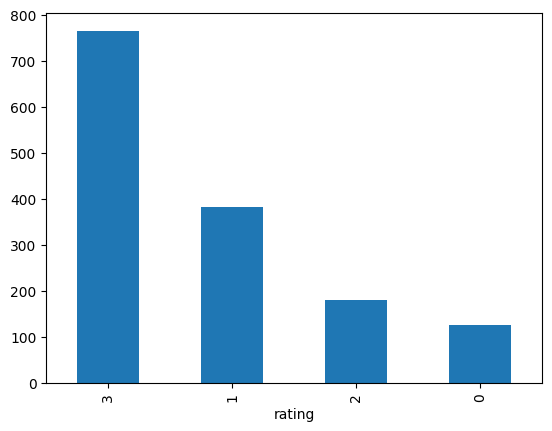

In [29]:
filtered_df['rating'].value_counts().plot.bar() # make plot better

looks good! 

In [30]:
import os

In [31]:
filtered_df

,rating,id,imdbid,year,title,passed_bechdel
143,3,7004,0007361,1916,Snow White,1
189,0,1308,0015648,1925,Battleship Potemkin,0
203,3,1227,0018033,1927,It,1
204,1,1267,0017136,1927,Metropolis,0
250,3,610,0022100,1931,M,1
...,...,...,...,...,...,...
10248,0,10843,16419074,2023,Air,0
10266,0,10947,24068064,2023,Reality,0
10378,3,11271,11762114,2024,Mean Girls,1
10385,3,11299,13452446,2024,Damsel,1


In [32]:
#import pandas as pd
#import os


# Path to the folder containing the raw text files
scripts_folder = 'matched_scripts'

# Extract matched titles from matched_pairs
matched_titles = [pair[0] for pair in matched_pairs]
matched_scripts = {pair[0]: pair[1] for pair in matched_pairs}  # Create a dictionary mapping title to script

# Function to read the script from a file
def read_script(title, folder=scripts_folder):
    script_file = matched_scripts.get(title)
    if script_file:
        script_path = os.path.join(folder, script_file)
        if os.path.exists(script_path):
            with open(script_path, 'r', encoding='utf-8') as file:
                return file.read()  # Read and return the file content
        else:
            print(f"Script file {script_file} not found for title {title}.")
            return ""
    return ""

# Loop through each row in the DataFrame and append the corresponding script
filtered_df['script'] = filtered_df['title'].apply(lambda title: read_script(title) if title in matched_titles else "")

# Display the updated DataFrame
filtered_df.head()


Script file Snow White and the Huntsman_1735898.txt not found for title Snow White.
Script file Battleship Potemkin_0015648.txt not found for title Battleship Potemkin.
Script file It Follows_3235888.txt not found for title It.
Script file Metropolis_0017136.txt not found for title Metropolis.
Script file MASH_0066026.txt not found for title M.
Script file Grand Hotel_0022958.txt not found for title Grand Hotel.
Script file Freaks_0022913.txt not found for title Freaks.
Script file Vampyr_0023649.txt not found for title Vampyr.
Script file Scarface_0086250.txt not found for title Scarface.
Script file King Kong_0024216.txt not found for title King Kong.
Script file Little Women_3281548.txt not found for title Little Women.
Script file Alice in Wonderland_1014759.txt not found for title Alice in Wonderland.
Script file Duck Soup_0023969.txt not found for title Duck Soup.
Script file It Happened One Night_0025316.txt not found for title It Happened One Night.
Script file Spitfire_5913184

/tmp/ipykernel_4640/2518134800.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['script'] = filtered_df['title'].apply(lambda title: read_script(title) if title in matched_titles else "")


,rating,id,imdbid,year,title,passed_bechdel,script
143,3,7004,0007361,1916,Snow White,1,
189,0,1308,0015648,1925,Battleship Potemkin,0,
203,3,1227,0018033,1927,It,1,
204,1,1267,0017136,1927,Metropolis,0,
250,3,610,0022100,1931,M,1,


In [ ]:
# now I want to upload the txt files and append them to the df one by one 
#matched_titles


In [33]:

# Define paths
scripts_folder = 'data/matched_scripts'  # The folder containing the script text files

# Extract matched titles from matched_pairs
matched_titles = [pair[0] for pair in matched_pairs]
matched_scripts = {pair[0]: pair[1] for pair in matched_pairs}  # Create a dictionary mapping title to script

# Function to read the script from a file with error handling for encoding issues
def read_script(title, folder=scripts_folder):
    script_file = matched_scripts.get(title)
    if script_file:
        script_path = os.path.join(folder, script_file)  # Construct the correct path
        if os.path.exists(script_path):
            try:
                # Try reading with UTF-8 encoding first
                with open(script_path, 'r', encoding='utf-8') as file:
                    return file.read()  # Read and return the file content
            except UnicodeDecodeError:
                # If UTF-8 fails, try ISO-8859-1 (latin1)
                with open(script_path, 'r', encoding='ISO-8859-1') as file:
                    return file.read()  # Read and return the file content
        else:
            print(f"Script file {script_file} not found for title {title}.")
            return ""
    return ""

# Loop through each row in the DataFrame and append the corresponding script content
filtered_df['script'] = filtered_df['title'].apply(lambda title: read_script(title) if title in matched_titles else "")

# Display the updated DataFrame
print(filtered_df)


Script file Three Kings_0120188.txt not found for title Three Kings.
Script file Little Athens_0417907.txt not found for title Little.
       rating     id    imdbid  year                title  passed_bechdel  \
143         3   7004   0007361  1916           Snow White               1   
189         0   1308   0015648  1925  Battleship Potemkin               0   
203         3   1227   0018033  1927                   It               1   
204         1   1267   0017136  1927           Metropolis               0   
250         3    610   0022100  1931                    M               1   
...       ...    ...       ...   ...                  ...             ...   
10248       0  10843  16419074  2023                  Air               0   
10266       0  10947  24068064  2023              Reality               0   
10378       3  11271  11762114  2024           Mean Girls               1   
10385       3  11299  13452446  2024               Damsel               1   
10398       1  113

/tmp/ipykernel_4640/3944822110.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['script'] = filtered_df['title'].apply(lambda title: read_script(title) if title in matched_titles else "")


In [34]:
filtered_df.head()

,rating,id,imdbid,year,title,passed_bechdel,script
143,3,7004,0007361,1916,Snow White,1,\n\n\n\n\n\n \n\n SN...
189,0,1308,0015648,1925,Battleship Potemkin,0,Battleship Potemkin\n\nScenario and script by ...
203,3,1227,0018033,1927,It,1,It Follows\nby\n\nDavid Robert Mitchell\n\nVer...
204,1,1267,0017136,1927,Metropolis,0,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n ...
250,3,610,0022100,1931,M,1,"""M*A*S..."


In [35]:
filtered_df['script'] # needs some work? 

143      \n\n\n\n\n\n \n\n                           SN...
189      Battleship Potemkin\n\nScenario and script by ...
203      It Follows\nby\n\nDavid Robert Mitchell\n\nVer...
204      \n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n  ...
250                                              "M*A*S...
                               ...                        
10248    Air Force One\n\n\n                           ...
10266    "REALITY BITES*\nWritten by\n\nHelen Childress...
10378    MEAN GIRLS\n\nby\nTina Fey\n‘Based on the beok...
10385    "Damsels in Distress"\n\nBy\n\nWhit Stillman\n...
10398    DUNKIRK\n\nby\nChristopher Nolan\n
D U N K I R...
Name: script, Length: 1453, dtype: object

In [ ]:
# save work
#filtered_df.to_csv('data/matched_titles_scripts.csv', index=False)


In [ ]:
#test = pd.read_csv("data/matched_titles_scripts.csv")
#test.head()

,imdbid,year,id,title,rating,passed_bechdel,script
0,7361,1916,7004,Snow White,3,1,\n\n\n\n\n\n \n\n SN...
1,15648,1925,1308,Battleship Potemkin,0,0,Battleship Potemkin\n\nScenario and script by ...
2,18033,1927,1227,It,3,1,It Follows\nby\n\nDavid Robert Mitchell\n\nVer...
3,17136,1927,1267,Metropolis,1,0,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n ...
4,22100,1931,610,M,3,1,"""M*A*S..."


In [37]:
filtered_df

,rating,id,imdbid,year,title,passed_bechdel,script
143,3,7004,0007361,1916,Snow White,1,\n\n\n\n\n\n \n\n SN...
189,0,1308,0015648,1925,Battleship Potemkin,0,Battleship Potemkin\n\nScenario and script by ...
203,3,1227,0018033,1927,It,1,It Follows\nby\n\nDavid Robert Mitchell\n\nVer...
204,1,1267,0017136,1927,Metropolis,0,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n ...
250,3,610,0022100,1931,M,1,"""M*A*S..."
...,...,...,...,...,...,...,...
10248,0,10843,16419074,2023,Air,0,Air Force One\n\n\n ...
10266,0,10947,24068064,2023,Reality,0,"""REALITY BITES*\nWritten by\n\nHelen Childress..."
10378,3,11271,11762114,2024,Mean Girls,1,MEAN GIRLS\n\nby\nTina Fey\n‘Based on the beok...
10385,3,11299,13452446,2024,Damsel,1,"""Damsels in Distress""\n\nBy\n\nWhit Stillman\n..."


In [38]:
filtered_df[50:100]

,rating,id,imdbid,year,title,passed_bechdel,script
668,1,8264,0040558,1948,Macbeth,0,FOR YOUR CONSIDERATION\n\nMACBETH\n\nBEST ADAP...
683,3,2232,0041594,1949,Little Women,1,LITTLE WOMEN\n\nWritten by\n\nGreta Gerwig\n\n...
684,0,2651,0041650,1949,Mighty Joe Young,0,\n\n\n\n\n\n\n\n MIGHT...
700,3,139,0042192,1950,All About Eve,1,\nFADE IN:\n\nINT. DINING HALL - SARAH SIDDONS...
706,2,2596,0042546,1950,Harvey,0,\n\n\nwindow.addEventListener('DOMContentLoade...
724,2,1417,0044079,1951,Strangers on a Train,0,STRANGERS ON A TRAIN\n\n ...
725,3,1207,0043274,1951,Alice in Wonderland,1,Alice\n\nby\nLinda Woolverton\n\nBased on\nAli...
736,3,5092,0043949,1951,Quo Vadis,1,QUO VADIS full feature animation film\n\nbased...
746,2,2704,0044706,1952,High Noon,0,EIGH NOON\n\nby\nCarl Foreman\n\nbased on a st...
749,3,5972,0043686,1952,Forbidden Games,1,\n\n\n\n\n\n JE...
